In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,roc_curve,precision_recall_curve,classification_report
from xgboost import XGBClassifier

In [2]:
url = 'https://raw.githubusercontent.com/ssivaguru/ICAML/main/data.csv'
df = pd.read_csv(url)

In [3]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.shape

(6819, 96)

In [ ]:
df['Bankrupt?'].value_counts()/df.shape[0]

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


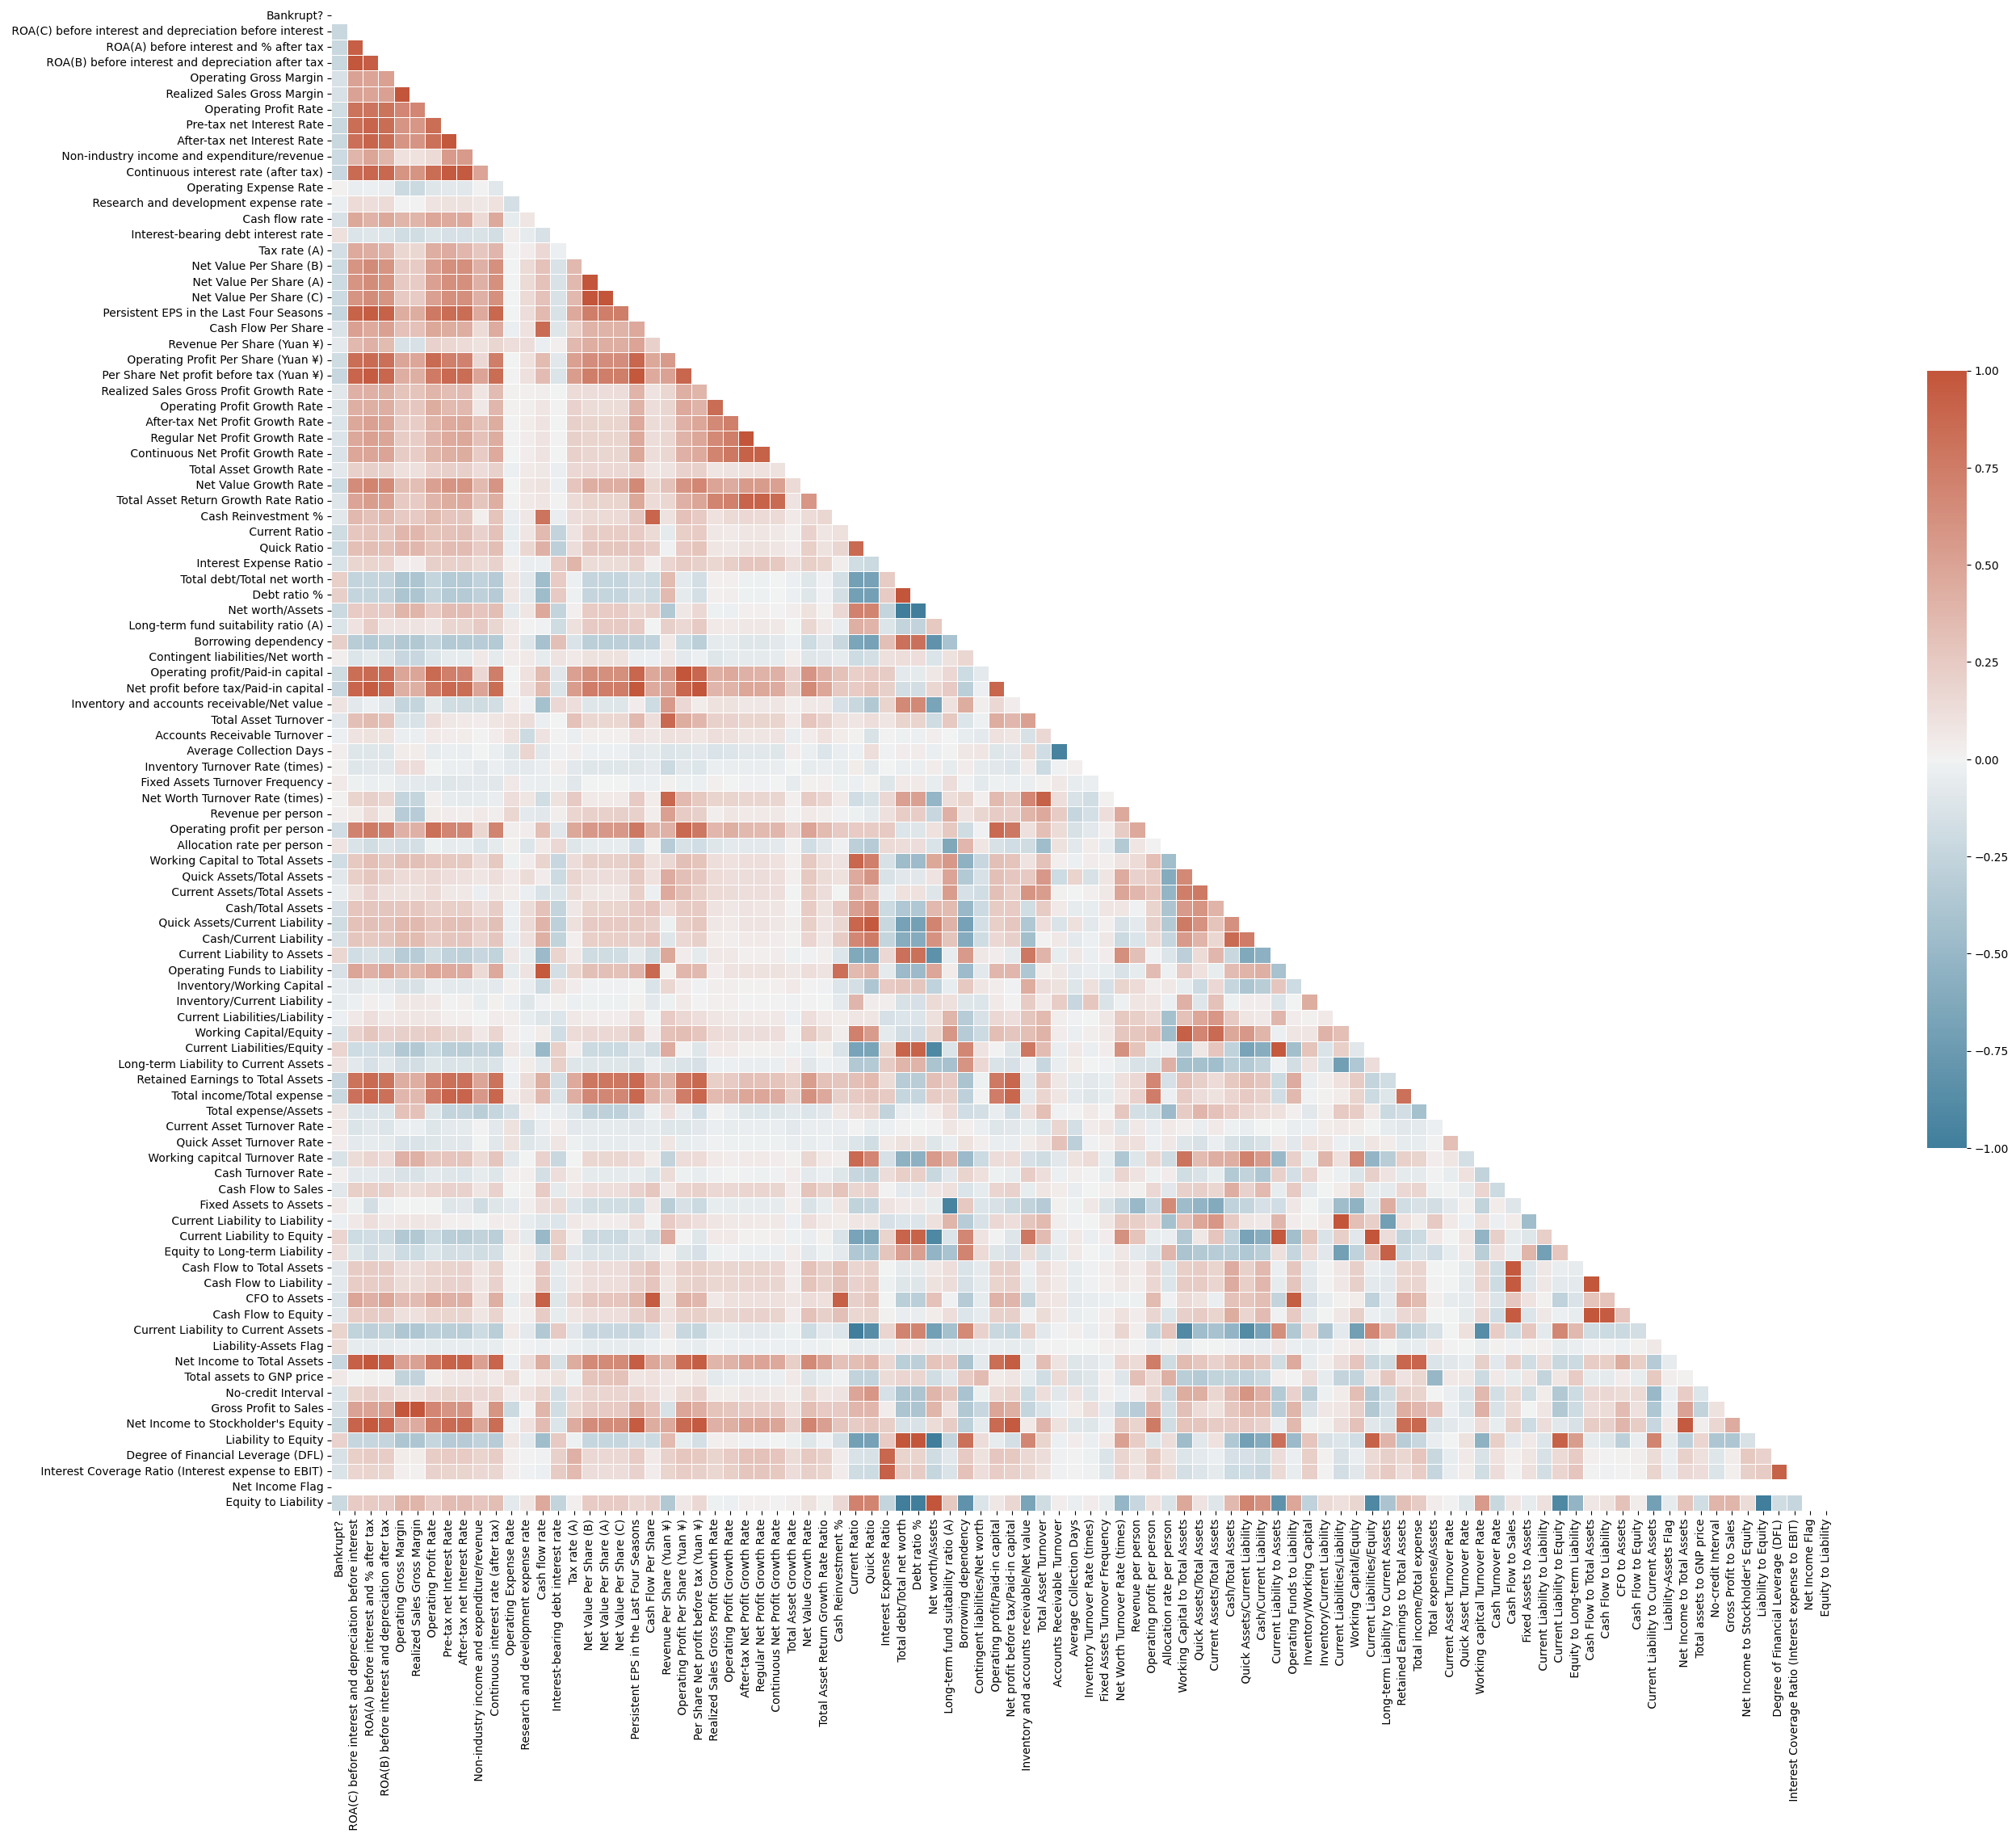

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

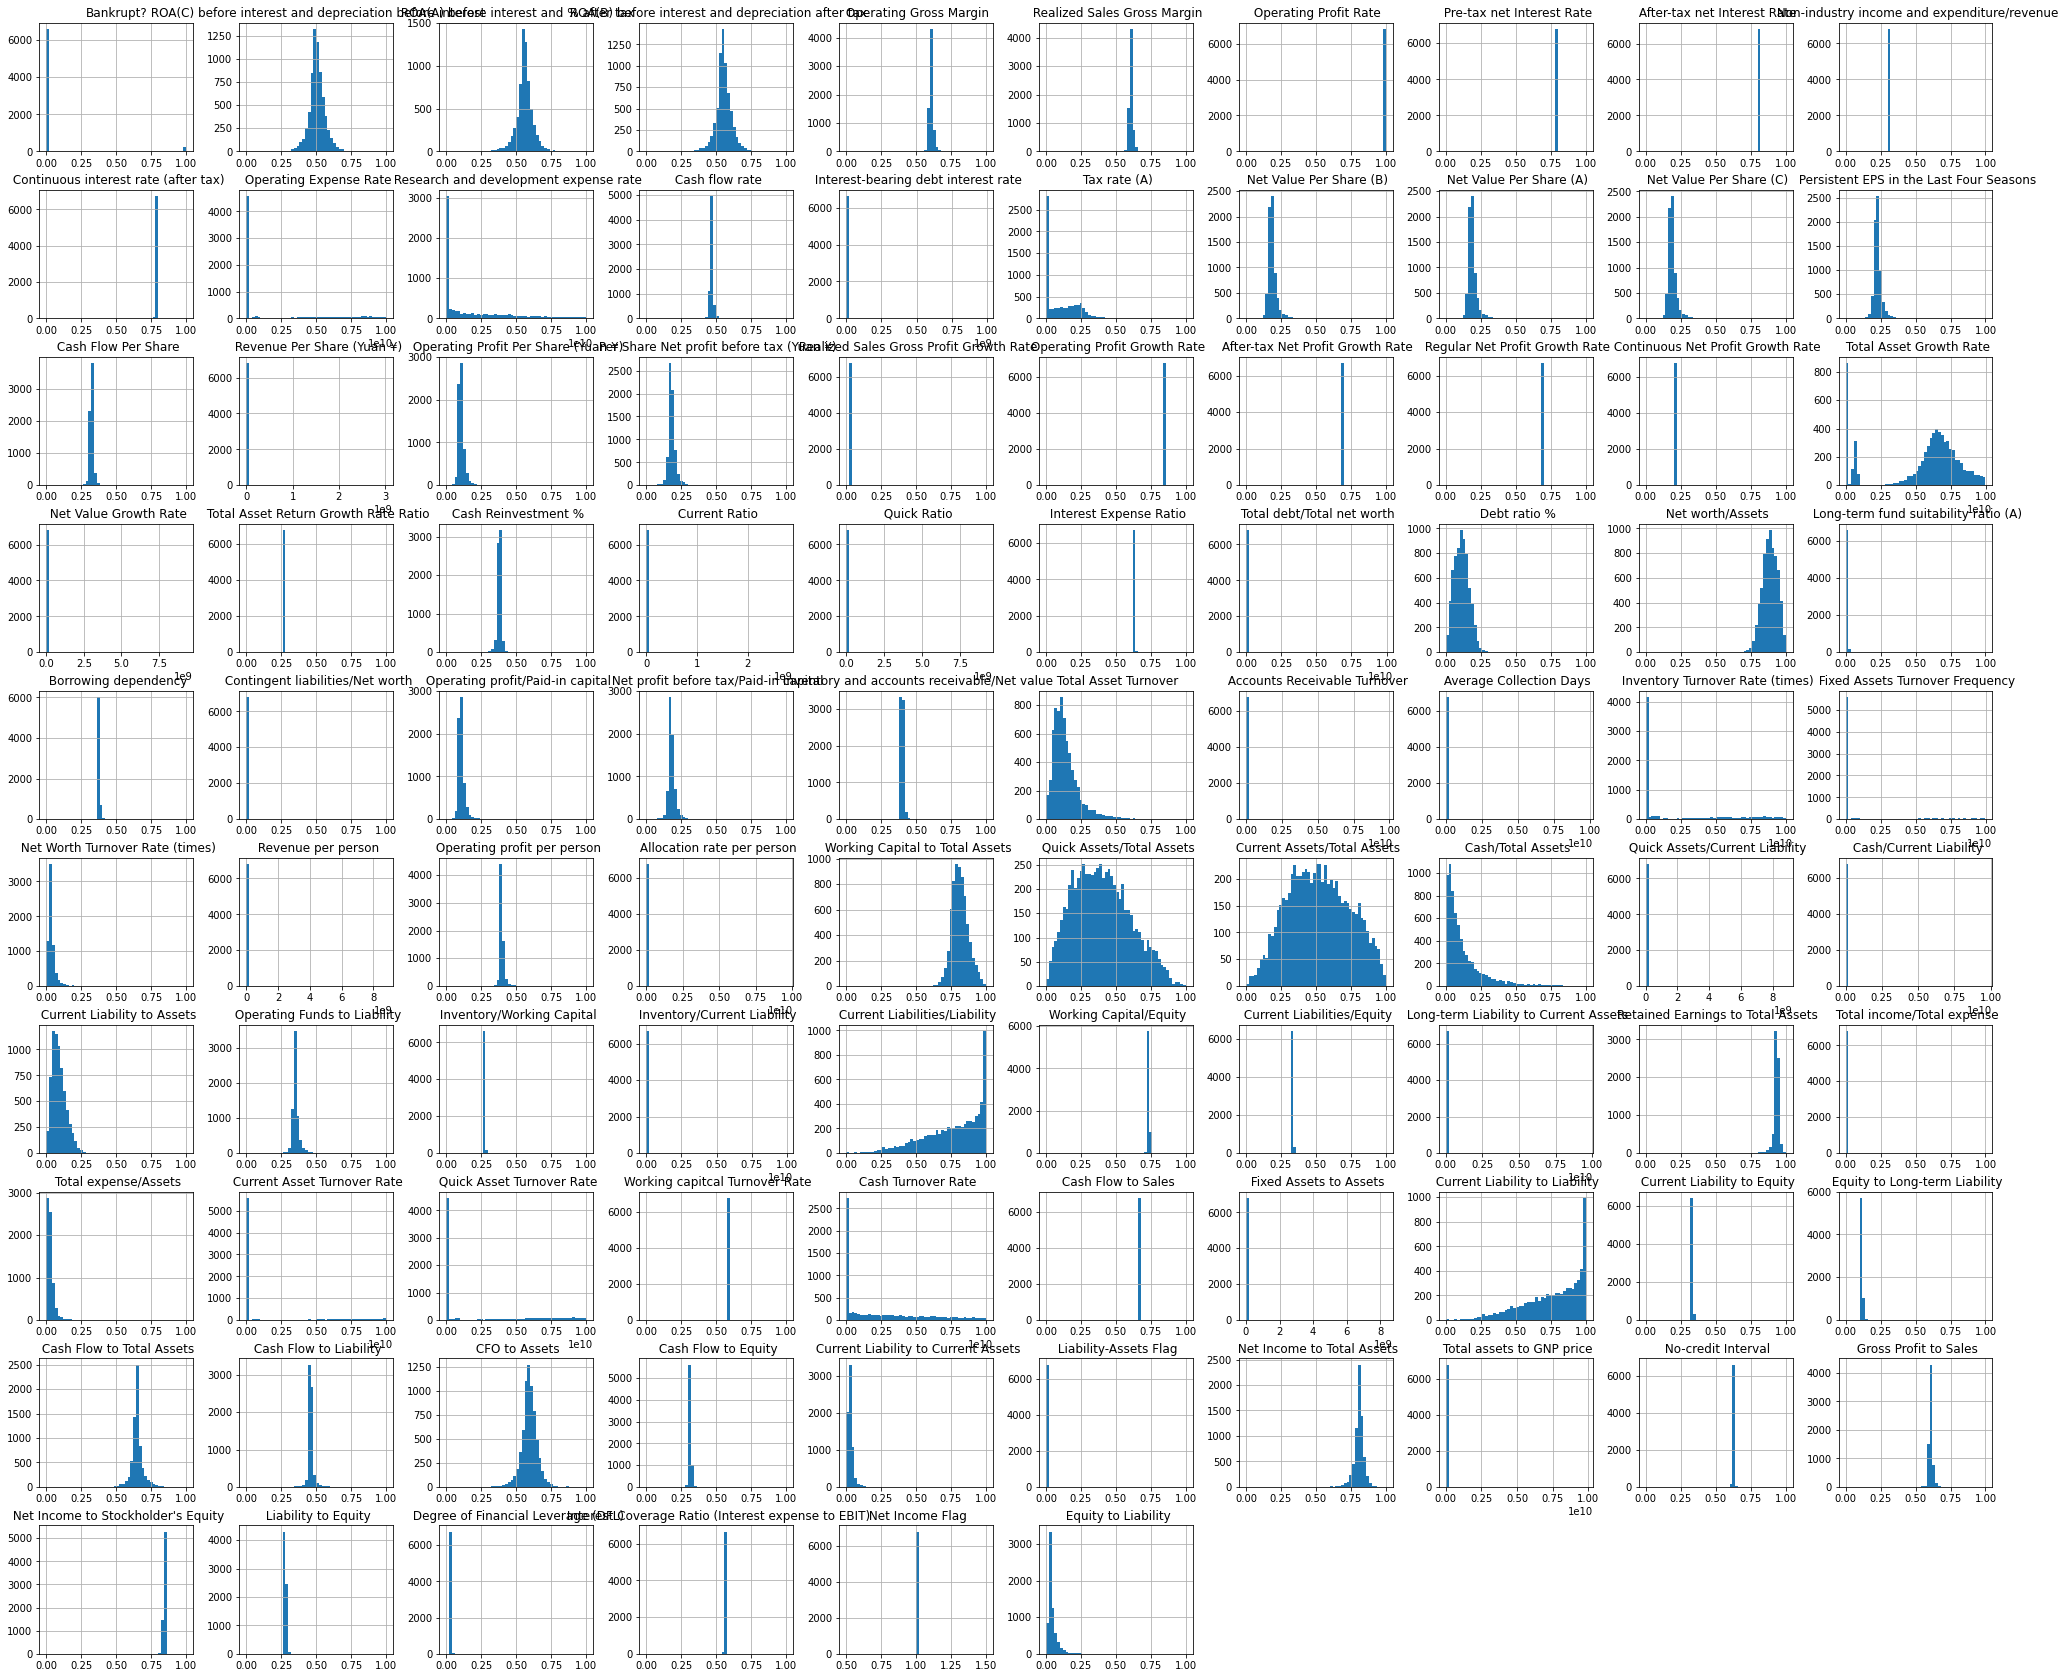

In [ ]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

In [5]:
from imblearn.over_sampling import SMOTE
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [6]:
X_train_i, X_test, y_train_i, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [7]:
oversample = SMOTE()
X_train,y_train=oversample.fit_resample(X_train_i,y_train_i)

In [8]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.535563,0.588912,0.595053,0.628216,0.628216,0.999354,0.797836,0.809736,0.303498,0.782024,...,0.827751,0.001361,0.620663,0.628212,0.841631,0.275276,0.026793,0.565167,1,0.172960
1,0.474382,0.507359,0.517426,0.595267,0.595267,0.998853,0.797185,0.809124,0.303411,0.781363,...,0.781277,0.009762,0.623591,0.595262,0.838942,0.278858,0.026603,0.564066,1,0.033409
2,0.450690,0.574738,0.509824,0.602524,0.602524,0.998866,0.797475,0.809428,0.303888,0.781523,...,0.820620,0.000272,0.623816,0.602520,0.841337,0.275641,0.026837,0.565370,1,0.111142
3,0.593965,0.641245,0.625033,0.612700,0.613262,0.999161,0.797830,0.809629,0.303892,0.781912,...,0.845460,0.001431,0.624288,0.612700,0.843590,0.278399,0.026793,0.565168,1,0.036270
4,0.375810,0.453227,0.453236,0.596441,0.596441,0.998903,0.797305,0.809255,0.303515,0.781509,...,0.750672,0.000364,0.623664,0.596440,0.829971,0.300119,0.026636,0.564294,1,0.014037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,0.415554,0.472288,0.469244,0.590835,0.590818,0.998740,0.797011,0.808995,0.303342,0.781220,...,0.754174,0.005463,0.622860,0.590833,0.834152,0.287868,0.026598,0.563038,1,0.017675
9894,0.454039,0.462825,0.504135,0.602902,0.602904,0.998966,0.797170,0.809104,0.303147,0.781424,...,0.752560,0.002983,0.622992,0.602898,0.831529,0.293828,0.029022,0.565720,1,0.015894
9895,0.485384,0.538209,0.539265,0.599383,0.599383,0.998919,0.797174,0.809084,0.303252,0.781336,...,0.795605,0.011086,0.623527,0.599381,0.840103,0.285025,0.028053,0.567073,1,0.019987
9896,0.417389,0.461379,0.456589,0.595740,0.595762,0.998931,0.797003,0.808949,0.302929,0.781012,...,0.741343,0.026404,0.617546,0.595739,0.827946,0.296593,0.026565,0.563708,1,0.017252


In [9]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
9893    1
9894    1
9895    1
9896    1
9897    1
Name: Bankrupt?, Length: 9898, dtype: int64

In [10]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_train)

In [11]:
X_train.shape

(9898, 95)

In [12]:
X_test.shape

(1705, 95)

Centering data along mean for appling PCA

In [13]:
std = StandardScaler()
X_train_centered = X_train - X_train.mean(axis=0)
X_train_centered_scaled= std.fit_transform(X_train_centered)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(X_train_centered_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.97) + 1

In [16]:
print('The n most important features is:',d)

The n most important features is: 54


In [17]:
cumsum

array([0.16874748, 0.24634514, 0.29699605, 0.33946643, 0.37908367,
       0.4147206 , 0.44877167, 0.47963361, 0.50758257, 0.53273678,
       0.55282813, 0.57078511, 0.58836538, 0.60533159, 0.62160308,
       0.63612483, 0.65052539, 0.66321988, 0.67571784, 0.68791728,
       0.69956006, 0.71107475, 0.72245387, 0.73364924, 0.74464652,
       0.75551362, 0.76627876, 0.77693484, 0.78755067, 0.79792624,
       0.80825565, 0.8184491 , 0.82833648, 0.83817891, 0.84782355,
       0.85686718, 0.86564125, 0.87437974, 0.88287165, 0.8912975 ,
       0.89952808, 0.9070221 , 0.91426761, 0.92122178, 0.92774674,
       0.93410005, 0.94000555, 0.94573089, 0.95130761, 0.95634838,
       0.96126277, 0.96560962, 0.96981525, 0.97325166, 0.97644123,
       0.97917471, 0.98133726, 0.98341905, 0.9853447 , 0.98716204,
       0.98891399, 0.99061904, 0.99207839, 0.99344904, 0.99464505,
       0.99564776, 0.99657312, 0.99731543, 0.99793965, 0.99844535,
       0.99884896, 0.99914712, 0.99942992, 0.9996261 , 0.99973

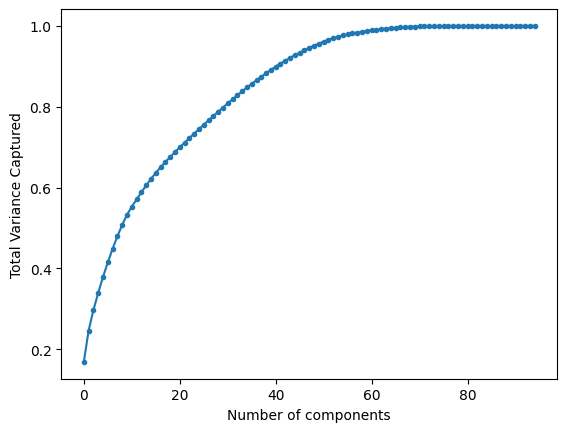

In [18]:
plt.xlabel("Number of components")
plt.ylabel("Total Variance Captured")
plt.plot(cumsum,marker ='.')

In [19]:
model_pca = PCA(n_components=55,random_state=42).fit(X_train_centered_scaled)
X_pca= model_pca.transform(X_train_centered_scaled)

In [20]:
n_pcs= model_pca.components_.shape[0]

In [21]:
var=model_pca.explained_variance_ratio_

In [22]:
most_important = [np.abs(model_pca.components_[i]).argmax() for i in range(n_pcs)]

In [23]:
len(most_important)

55

In [24]:
pca_important_x_train_feat = X_train.iloc[:,most_important]
pca_important_x_test_feat = X_test.iloc[:,most_important]

In [25]:
std_pca = StandardScaler()
pca_important_x_train_feat_scaled = std_pca.fit_transform(pca_important_x_train_feat)
pca_important_x_test_feat_scaled = std_pca.transform(pca_important_x_test_feat)

In [26]:
std_norm = StandardScaler()
X_train_scaled = std_norm.fit_transform(X_train)
X_test_scaled = std_norm.transform(X_test)

## **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='lbfgs', max_iter=10000)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [28]:
y_pred=log_model.predict(X_test_scaled)

In [29]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.893841642228739
Confusion Matrix: 
[[1481  169]
 [  12   43]]
Area Under Curve: 0.8396969696969697
F1 Score: 0.32209737827715357
Precision Score: 0.2028301886792453
Recall Score: 0.7818181818181819


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1650
           1       0.20      0.78      0.32        55

    accuracy                           0.89      1705
   macro avg       0.60      0.84      0.63      1705
weighted avg       0.97      0.89      0.92      1705



In [31]:
pred_prob=log_model.predict_proba(X_test_scaled)
fpr, tpr, thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score=round(roc_auc_score(y_test,y_pred),2)

<ipython-input-32-ebab3b448073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


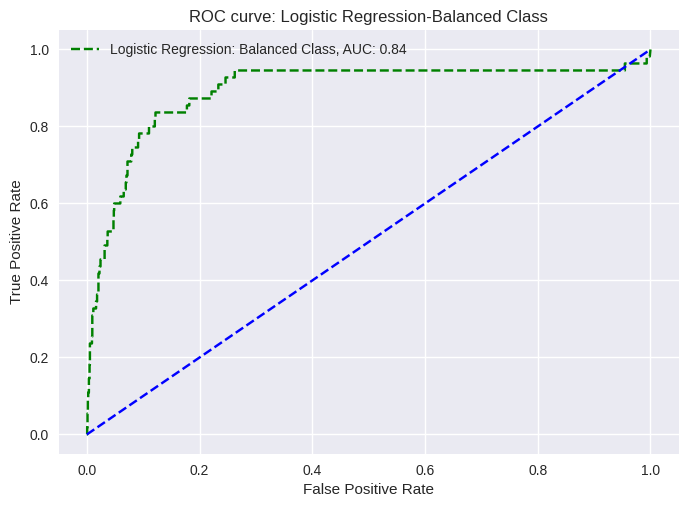

In [32]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label="Logistic Regression: Balanced Class, AUC: "+str(auc_score))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve: Logistic Regression-Balanced Class')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [33]:
pred_prob=log_model.predict_proba(X_test_scaled)
precision, recall, thresh=precision_recall_curve(y_test,pred_prob[:,1],pos_label=1)

<ipython-input-34-66fb1b954573>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


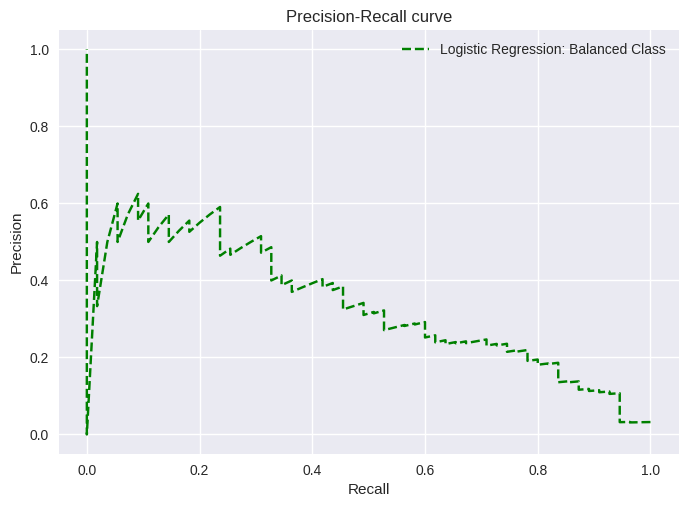

In [34]:


plt.style.use('seaborn')

# plot precision-recall curve
plt.plot(recall, precision, linestyle='--',color='green', label="Logistic Regression: Balanced Class")

# title
plt.title('Precision-Recall curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show();

## Logistic Regression Model with PCA reduced features

In [35]:
from sklearn.linear_model import LogisticRegression
log_model_pca=LogisticRegression(solver='lbfgs', max_iter=10000)
log_model_pca.fit(pca_important_x_train_feat_scaled,y_train)

LogisticRegression(max_iter=10000)

In [36]:
y_pred_pca=log_model_pca.predict(pca_important_x_test_feat_scaled)

In [37]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_pca)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_pca)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_pca)}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca)}')
print(f'Precision Score: {precision_score(y_test, y_pred_pca)}')
print(f'Recall Score: {recall_score(y_test, y_pred_pca)}')

Accuracy Score: 0.8791788856304985
Confusion Matrix: 
[[1452  198]
 [   8   47]]
Area Under Curve: 0.8672727272727272
F1 Score: 0.3133333333333333
Precision Score: 0.19183673469387755
Recall Score: 0.8545454545454545


In [38]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.19      0.85      0.31        55

    accuracy                           0.88      1705
   macro avg       0.59      0.87      0.62      1705
weighted avg       0.97      0.88      0.91      1705



## Decision tree classifier model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features=55,random_state=42)
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=15, max_features=55, random_state=42)

In [78]:
y_pred=dt_model.predict(X_test_scaled)

In [79]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')


Accuracy Score: 0.9167155425219942
Confusion Matrix: 
[[1535  115]
 [  27   28]]
Area Under Curve: 0.7196969696969696
F1 Score: 0.2828282828282828
Precision Score: 0.1958041958041958
Recall Score: 0.509090909090909


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1650
           1       0.20      0.51      0.28        55

    accuracy                           0.92      1705
   macro avg       0.59      0.72      0.62      1705
weighted avg       0.96      0.92      0.93      1705



# Hyperparameter tuning of Decision tree classifier model

In [64]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid_dt = [{'max_depth': [15],'max_features': [55,60,70]}]

In [74]:
grid_search_dt = GridSearchCV(dt_model,param_grid_dt,cv=5,scoring='f1',verbose=3)

In [75]:
grid_search_dt.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....max_depth=15, max_features=55;, score=0.956 total time=   1.3s
[CV 2/5] END .....max_depth=15, max_features=55;, score=0.956 total time=   1.1s
[CV 3/5] END .....max_depth=15, max_features=55;, score=0.952 total time=   0.8s
[CV 4/5] END .....max_depth=15, max_features=55;, score=0.962 total time=   0.5s
[CV 5/5] END .....max_depth=15, max_features=55;, score=0.957 total time=   0.4s
[CV 1/5] END .....max_depth=15, max_features=60;, score=0.954 total time=   0.4s
[CV 2/5] END .....max_depth=15, max_features=60;, score=0.957 total time=   0.5s
[CV 3/5] END .....max_depth=15, max_features=60;, score=0.953 total time=   0.5s
[CV 4/5] END .....max_depth=15, max_features=60;, score=0.952 total time=   0.5s
[CV 5/5] END .....max_depth=15, max_features=60;, score=0.955 total time=   0.5s
[CV 1/5] END .....max_depth=15, max_features=70;, score=0.952 total time=   0.5s
[CV 2/5] END .....max_depth=15, max_features=70;,

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, max_features=50,
                                              random_state=42),
             param_grid=[{'max_depth': [15], 'max_features': [55, 60, 70]}],
             scoring='f1', verbose=3)

In [76]:
grid_search_dt.best_params_

{'max_depth': 15, 'max_features': 55}

## Plotting decision tree

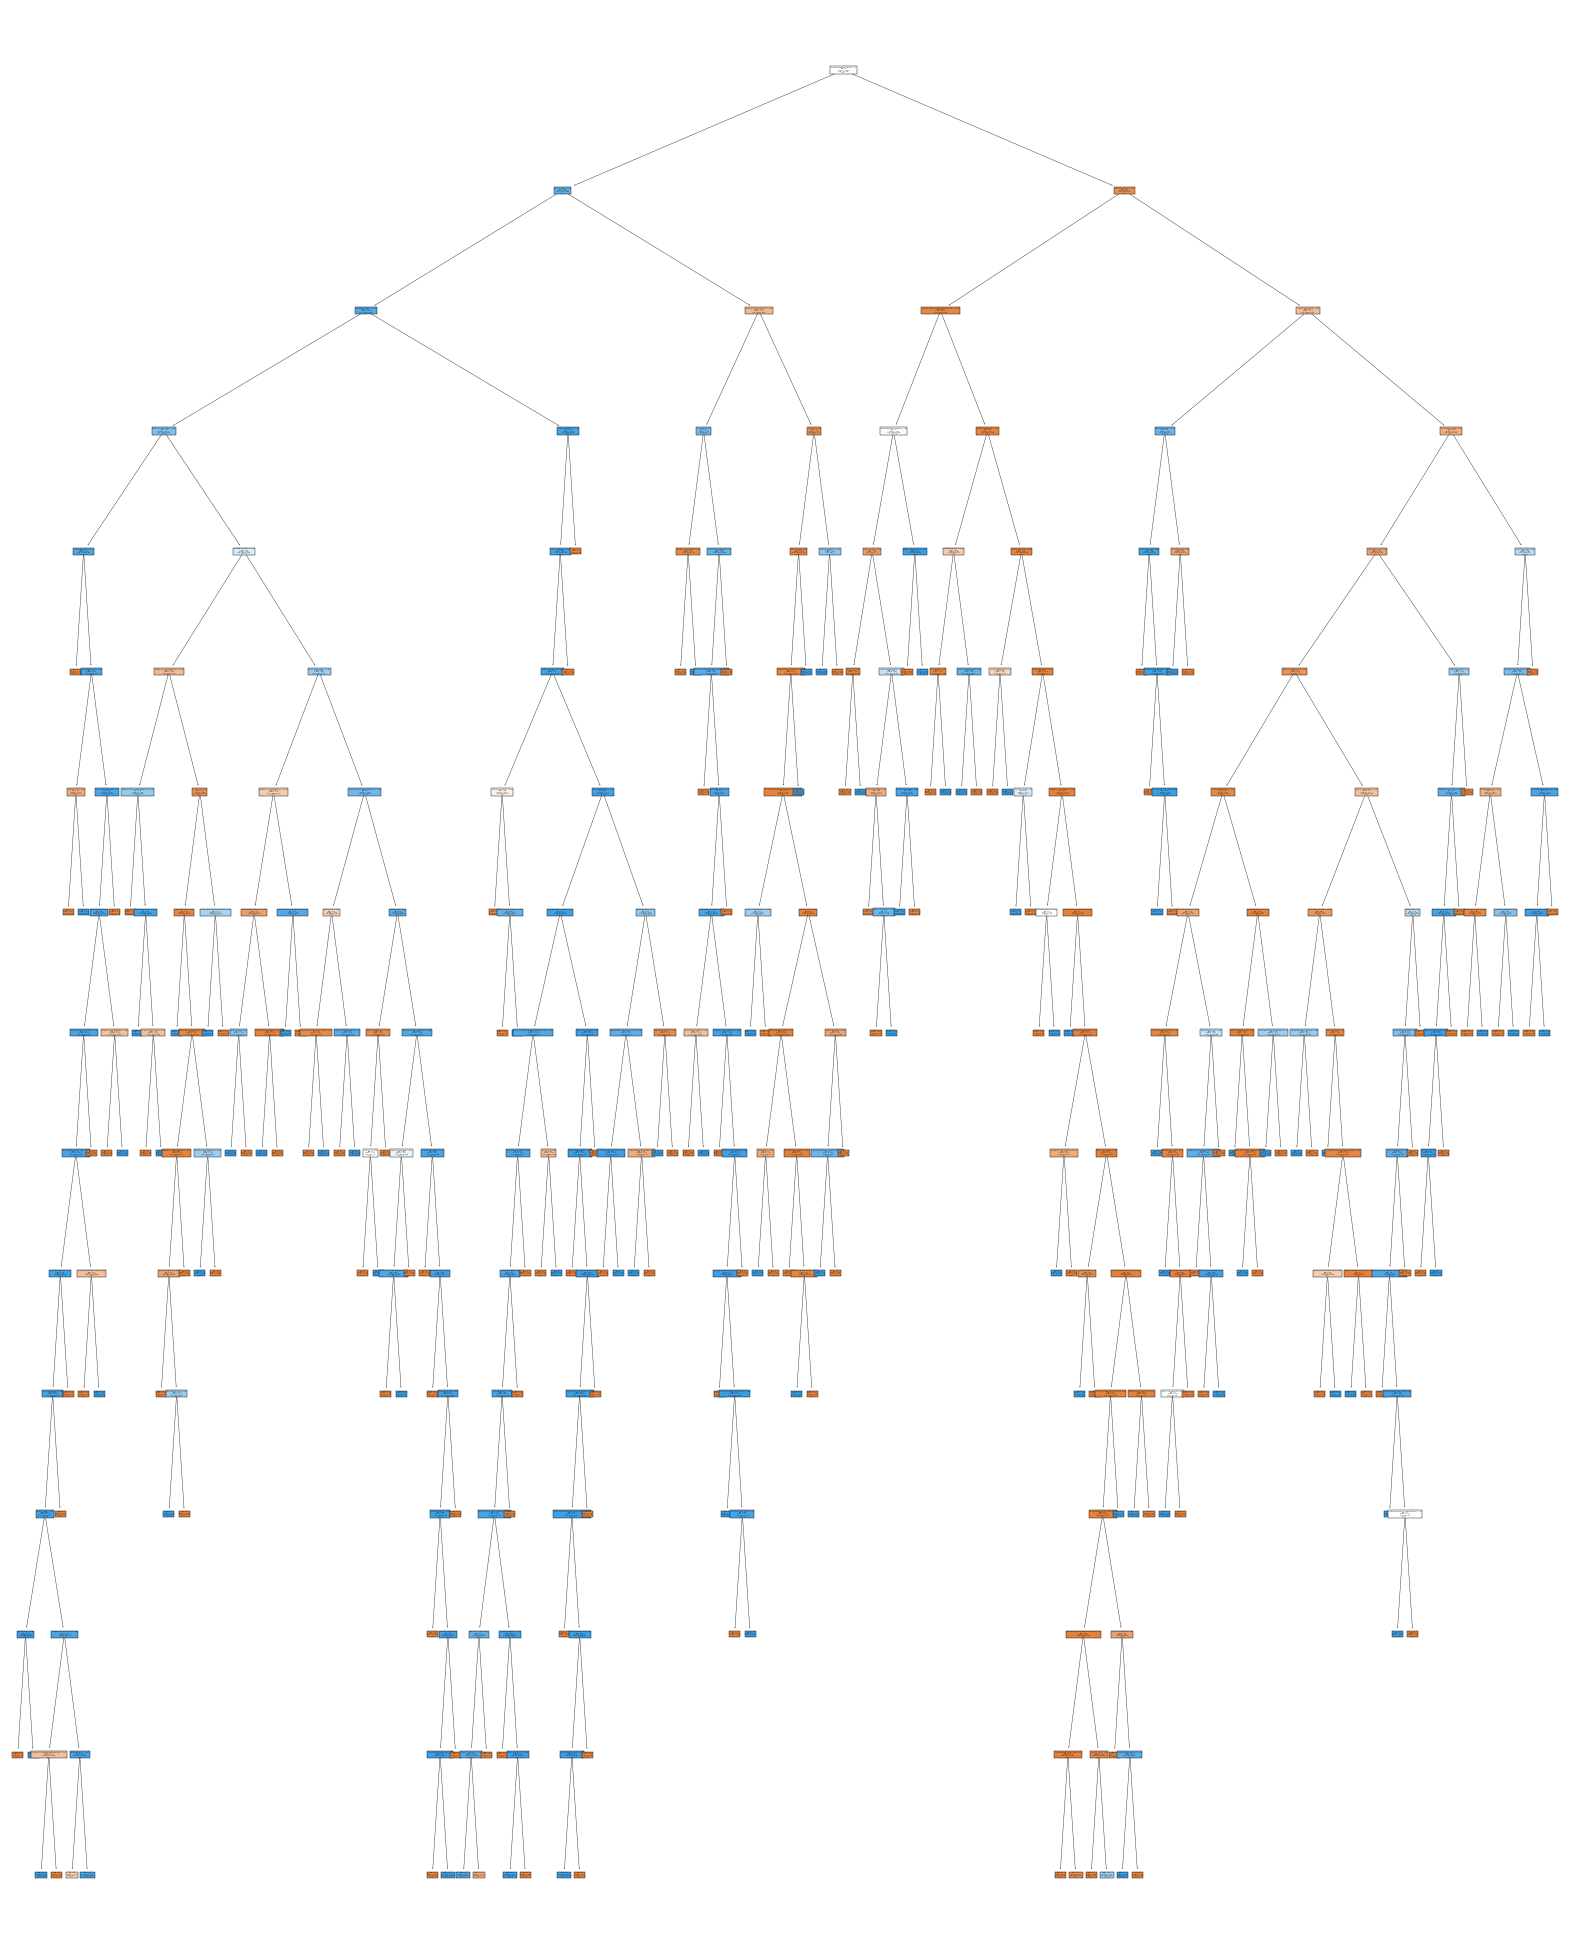

In [81]:
#Plotting Decision Tree
col_names= df.columns[1:]
target_names=X_train.columns[0]

from sklearn import tree
plt.rcParams['figure.figsize'] = (20, 25)

tree.plot_tree(dt_model, filled=True, feature_names=col_names, class_names=target_names, proportion=True);
plt.savefig('DT.png')

## Decision tree classifier model with PCA reduced **feature**

In [92]:
dt_model_pca=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features=50,random_state=42)
dt_model_pca.fit(pca_important_x_train_feat_scaled,y_train)

DecisionTreeClassifier(max_depth=15, max_features=50, random_state=42)

In [93]:
y_pred_pca=dt_model_pca.predict(pca_important_x_test_feat_scaled)

In [94]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_pca)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_pca)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_pca)}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca)}')
print(f'Precision Score: {precision_score(y_test, y_pred_pca)}')
print(f'Recall Score: {recall_score(y_test, y_pred_pca)}')

Accuracy Score: 0.9225806451612903
Confusion Matrix: 
[[1542  108]
 [  24   31]]
Area Under Curve: 0.749090909090909
F1 Score: 0.31958762886597936
Precision Score: 0.22302158273381295
Recall Score: 0.5636363636363636


In [95]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1650
           1       0.22      0.56      0.32        55

    accuracy                           0.92      1705
   macro avg       0.60      0.75      0.64      1705
weighted avg       0.96      0.92      0.94      1705



## Hyperparameter tuning of DT model with PCA reduced feature

In [88]:
param_grid_dt_pca = [{'max_depth': [15],'max_features': [38,50,60]}]

In [89]:
grid_search_dt_pca = GridSearchCV(dt_model_pca,param_grid_dt_pca,cv=5,scoring='f1',verbose=3)

In [90]:
grid_search_dt_pca.fit(pca_important_x_train_feat_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=15, max_features=38;, score=0.951 total time=   0.3s
[CV 2/5] END .....max_depth=15, max_features=38;, score=0.951 total time=   0.3s
[CV 3/5] END .....max_depth=15, max_features=38;, score=0.952 total time=   0.2s
[CV 4/5] END .....max_depth=15, max_features=38;, score=0.956 total time=   0.2s
[CV 5/5] END .....max_depth=15, max_features=38;, score=0.959 total time=   0.2s
[CV 1/5] END .....max_depth=15, max_features=50;, score=0.954 total time=   0.3s
[CV 2/5] END .....max_depth=15, max_features=50;, score=0.955 total time=   0.3s
[CV 3/5] END .....max_depth=15, max_features=50;, score=0.959 total time=   0.3s
[CV 4/5] END .....max_depth=15, max_features=50;, score=0.955 total time=   0.3s
[CV 5/5] END .....max_depth=15, max_features=50;, score=0.958 total time=   0.3s
[CV 1/5] END .....max_depth=15, max_features=60;, score=0.956 total time=   0.4s
[CV 2/5] END .....max_depth=15, max_features=60;,

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=13, max_features=30,
                                              random_state=42),
             param_grid=[{'max_depth': [15, 20, 30],
                          'max_features': [38, 50, 60]}],
             scoring='f1', verbose=3)

In [91]:
grid_search_dt_pca.best_params_

{'max_depth': 15, 'max_features': 50}

# Random forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf=RandomForestClassifier(max_depth=27,n_estimators = 140,oob_score=True,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=27, n_estimators=140, oob_score=True,
                       random_state=42)

In [101]:
y_pred=rf.predict(X_test_scaled)

In [102]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.950733137829912
Confusion Matrix: 
[[1591   59]
 [  25   30]]
Area Under Curve: 0.7548484848484848
F1 Score: 0.4166666666666667
Precision Score: 0.33707865168539325
Recall Score: 0.5454545454545454


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1650
           1       0.34      0.55      0.42        55

    accuracy                           0.95      1705
   macro avg       0.66      0.75      0.70      1705
weighted avg       0.96      0.95      0.96      1705



In [ ]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = [{'n_estimators': [140,150,175],'max_depth': [15,27,40]}]

In [97]:
grid_search_rf = GridSearchCV(rf,param_grid,cv=5,scoring='f1',verbose=3)

In [98]:
grid_search_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=15, n_estimators=140;, score=0.980 total time=   6.3s
[CV 2/5] END ....max_depth=15, n_estimators=140;, score=0.977 total time=   6.5s
[CV 3/5] END ....max_depth=15, n_estimators=140;, score=0.973 total time=   6.2s
[CV 4/5] END ....max_depth=15, n_estimators=140;, score=0.978 total time=   6.5s
[CV 5/5] END ....max_depth=15, n_estimators=140;, score=0.972 total time=   6.1s
[CV 1/5] END ....max_depth=15, n_estimators=150;, score=0.980 total time=   6.9s
[CV 2/5] END ....max_depth=15, n_estimators=150;, score=0.977 total time=   6.5s
[CV 3/5] END ....max_depth=15, n_estimators=150;, score=0.972 total time=   6.8s
[CV 4/5] END ....max_depth=15, n_estimators=150;, score=0.978 total time=   6.5s
[CV 5/5] END ....max_depth=15, n_estimators=150;, score=0.972 total time=   6.8s
[CV 1/5] END ....max_depth=15, n_estimators=175;, score=0.980 total time=   7.9s
[CV 2/5] END ....max_depth=15, n_estimators=175;,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=27, n_estimators=150,
                                              oob_score=True, random_state=42),
             param_grid=[{'max_depth': [15, 27, 40],
                          'n_estimators': [140, 150, 175]}],
             scoring='f1', verbose=3)

In [99]:
grid_search_rf.best_params_

{'max_depth': 27, 'n_estimators': 140}

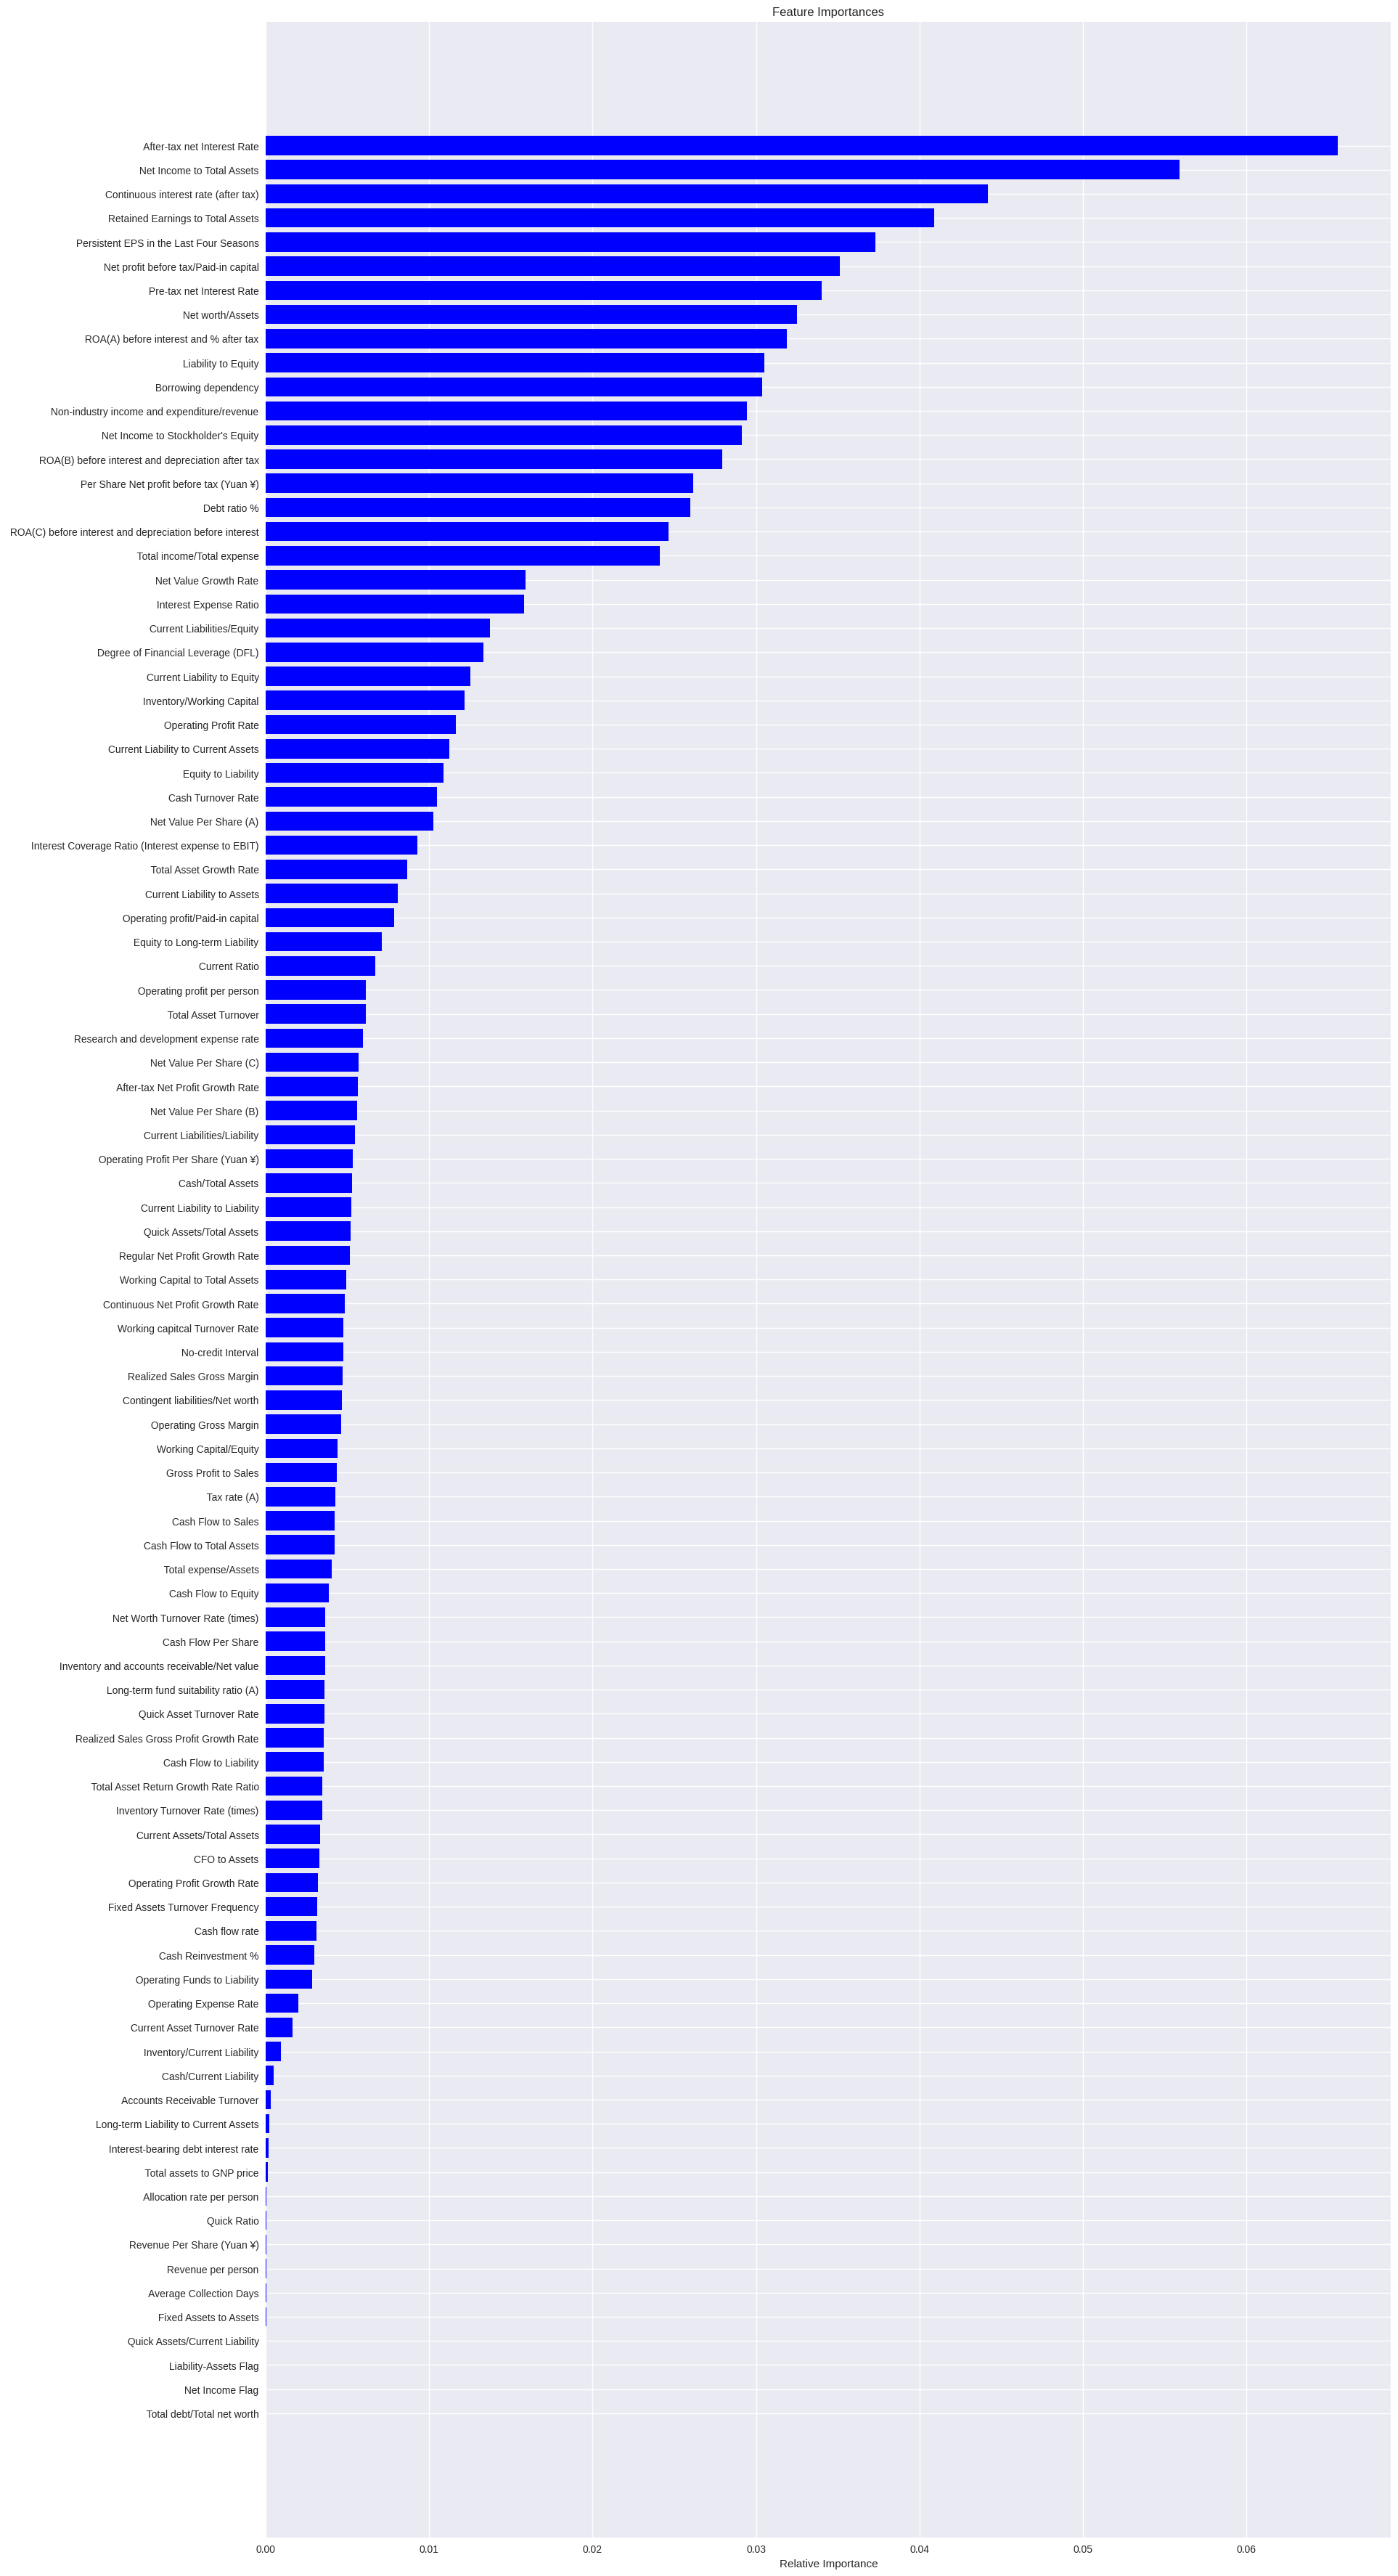

In [104]:
#Feature Importance plot
features = df.columns[1:]
importances = rf.feature_importances_
indices = np.argsort(importances)


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(45)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [105]:
from sklearn.ensemble import VotingClassifier

In [110]:
clf1=LogisticRegression(random_state=42,max_iter=10000)
clf2=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features=55,random_state=42)
clf3=RandomForestClassifier(max_depth=27,oob_score=True,random_state=42,n_estimators=140)


In [111]:
#Hard Voting
voting_hard=VotingClassifier(estimators=[('lr',clf1),('dt',clf2),('rf',clf3)],voting='hard')
voting_hard.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features=55,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=27,
                                                     n_estimators=140,
                                                     oob_score=True,
                                                     random_state=42))])

In [112]:
y_pred=voting_hard.predict(X_test_scaled)

In [113]:
# performance-hard voting
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.9384164222873901
Confusion Matrix: 
[[1568   82]
 [  23   32]]
Area Under Curve: 0.766060606060606
F1 Score: 0.378698224852071
Precision Score: 0.2807017543859649
Recall Score: 0.5818181818181818


In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1650
           1       0.28      0.58      0.38        55

    accuracy                           0.94      1705
   macro avg       0.63      0.77      0.67      1705
weighted avg       0.96      0.94      0.95      1705



In [115]:
#Soft Voting
voting_soft=VotingClassifier(estimators=[('lr',clf1),('dt',clf2),('rf',clf3)],voting='soft')
voting_soft.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features=55,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=27,
                                                     n_estimators=140,
                                                     oob_score=True,
                                                     random_state=42))],
                 voting='soft')

In [116]:
y_pred=voting_soft.predict(X_test_scaled)

In [117]:
# performance-soft voting
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.930791788856305
Confusion Matrix: 
[[1556   94]
 [  24   31]]
Area Under Curve: 0.7533333333333333
F1 Score: 0.34444444444444444
Precision Score: 0.248
Recall Score: 0.5636363636363636


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1650
           1       0.25      0.56      0.34        55

    accuracy                           0.93      1705
   macro avg       0.62      0.75      0.65      1705
weighted avg       0.96      0.93      0.94      1705

